<a href="https://colab.research.google.com/github/jaskirat0001/implied-volatility/blob/main/Implied_Volatility.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
from mpl_toolkits import mplot3d
from itertools import chain
from datetime import datetime
from matplotlib import cm

In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.4/51.4 KB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 KB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 55.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 7.1 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

In [ ]:
sticker = "AMZN"
z = yf.Ticker(sticker)
stock_options_data = list(z.options)
stock_options_data


['2023-01-20',
 '2023-01-27',
 '2023-02-03',
 '2023-02-10',
 '2023-02-17',
 '2023-02-24',
 '2023-03-17',
 '2023-04-21',
 '2023-06-16',
 '2023-07-21',
 '2023-09-15',
 '2023-10-20',
 '2024-01-19',
 '2024-06-21',
 '2024-09-20',
 '2025-01-17',
 '2025-06-20']

In [ ]:
today = datetime.now().date()
days_remained=[]
option_values_data=[]

for i in stock_options_data:
  maturity_date = datetime.strptime(i, '%Y-%m-%d').date()
  # difference=(stock_options_data[i]-today).days()
  # days_remained.append(
  days_remained.append((maturity_date - today).days)

  option_values_data.append(z.option_chain(i).calls)
  print(list(days_remained))
  print(option_values_data)

Streaming output truncated to the last 5000 lines.
9   AMZN230127C00077000 2023-01-13 16:47:29+00:00    77.0      19.52  21.05   
10  AMZN230127C00078000 2023-01-13 19:56:34+00:00    78.0      20.14  19.85   
11  AMZN230127C00079000 2023-01-11 19:00:39+00:00    79.0      15.20  19.05   
12  AMZN230127C00080000 2023-01-13 19:31:17+00:00    80.0      18.50  18.10   
13  AMZN230127C00081000 2023-01-13 17:33:17+00:00    81.0      16.05  16.90   
14  AMZN230127C00082000 2023-01-13 20:33:41+00:00    82.0      16.36  15.90   
15  AMZN230127C00083000 2023-01-13 20:03:19+00:00    83.0      13.77  14.95   
16  AMZN230127C00084000 2023-01-13 20:44:27+00:00    84.0      14.25  14.00   
17  AMZN230127C00085000 2023-01-13 20:54:40+00:00    85.0      13.45  13.00   
18  AMZN230127C00086000 2023-01-13 20:56:28+00:00    86.0      12.46  12.35   
19  AMZN230127C00087000 2023-01-13 20:58:03+00:00    87.0      11.50  11.40   
20  AMZN230127C00088000 2023-01-13 20:58:13+00:00    88.0      10.58  10.45   
2

In [ ]:
lstrike=[]
lImpvol=[]
days_remained_extended=[]

for j in range(0,len(option_values_data)):
  lstrike.append(option_values_data[j]["strike"])
  # print(lstrike)
  days_remained_extended.append(np.repeat(days_remained[j], len(option_values_data[j])))
  lImpvol.append(option_values_data[j]["impliedVolatility"])
# print(lstrike)
lstrike = list(chain(*lstrike))
# print(lstrike)
lImpvol = list(chain(*lImpvol))
days_remained_extended = list(chain(*days_remained_extended))
print(lstrike)
print(lImpvol)
print(days_remained_extended)

[50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 72.5, 73.0, 74.0, 75.0, 76.0, 77.0, 77.5, 78.0, 79.0, 80.0, 81.0, 82.0, 82.5, 83.0, 84.0, 85.0, 86.0, 87.0, 87.5, 88.0, 89.0, 90.0, 91.0, 92.0, 92.5, 93.0, 94.0, 95.0, 96.0, 97.0, 97.5, 98.0, 99.0, 100.0, 101.0, 102.0, 102.5, 103.0, 104.0, 105.0, 106.0, 106.5, 106.75, 107.0, 107.25, 107.5, 107.75, 108.0, 108.25, 108.5, 108.75, 109.0, 109.25, 109.5, 109.75, 110.0, 110.25, 110.5, 110.75, 111.0, 111.25, 111.5, 111.75, 112.0, 112.25, 112.5, 112.75, 113.0, 113.25, 113.5, 113.75, 114.0, 114.25, 114.5, 114.75, 115.0, 115.25, 115.5, 115.75, 116.0, 116.25, 116.5, 116.75, 117.0, 117.25, 117.5, 117.75, 118.0, 118.25, 118.5, 120.0, 122.5, 125.0, 127.5, 130.0, 132.5, 135.0, 137.5, 140.0, 142.5, 145.0, 147.0, 147.5, 148.0, 149.0, 150.0, 151.0, 152.0, 152.5, 153.0, 154.0, 154.5, 155.0, 155.5, 156.0, 156.5, 157.0, 157.5, 158.0, 158.5, 159.0, 159.5, 160.0, 160.5, 16

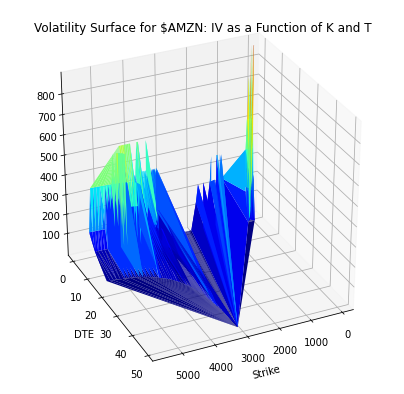

In [ ]:
fig = plt.figure(figsize=(7,7))
axs = plt.axes(projection="3d")
axs.plot_trisurf(lstrike,lImpvol,days_remained_extended,cmap = cm.jet)
axs.view_init(30,65)
plt.xlabel("Strike")
plt.ylabel("DTE")
plt.title("Volatility Surface for $"+sticker+": IV as a Function of K and T")
plt.show()
